In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
seed = 72
np.random.seed(seed)

In [54]:
#creating random data
n = 10001
sim_ids = np.arange(n)
sim_df = pd.DataFrame(data=sim_ids,columns=['ids'] )
sim_df.head()

,ids
0,0
1,1
2,2
3,3
4,4


In [55]:
random_var1 = np.random.normal(0, 5, sim_ids.size)
random_var2 = np.random.normal(4, 2, sim_ids.size)
sim_df['var1'] = pd.Series(random_var1, index=sim_df.index)
sim_df['var2'] = pd.Series(random_var2, index=sim_df.index)
sim_df.head()

,ids,var1,var2
0,0,0.137314,3.185470
1,1,8.323652,7.913226
2,2,-10.059653,5.311017
3,3,4.588979,2.496522
4,4,5.219192,4.129014


In [56]:
# Getting a random sample from the population
n_samples = 400
samples_df = sim_df.sample(n_samples, random_state=seed)
samples_df.describe()

,ids,var1,var2
count,400.000000,400.000000,400.000000
mean,4809.572500,0.037350,4.040055
std,2952.257218,5.380064,1.798189
min,4.000000,-19.370539,-2.244991
25%,2079.000000,-3.811128,2.881558
50%,4545.000000,0.128654,4.167469
75%,7541.750000,4.021078,5.188663
max,9962.000000,13.397434,9.917593


In [57]:
is_control = np.random.choice([0,1], size=n_samples)
samples_df = samples_df.assign(is_control=is_control)
samples_df.describe()

,ids,var1,var2,is_control
count,400.000000,400.000000,400.000000,400.00000
mean,4809.572500,0.037350,4.040055,0.49250
std,2952.257218,5.380064,1.798189,0.50057
min,4.000000,-19.370539,-2.244991,0.00000
25%,2079.000000,-3.811128,2.881558,0.00000
50%,4545.000000,0.128654,4.167469,0.00000
75%,7541.750000,4.021078,5.188663,1.00000
max,9962.000000,13.397434,9.917593,1.00000


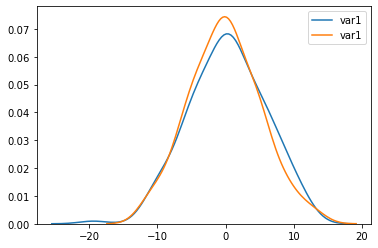

In [58]:
sns.kdeplot(samples_df[samples_df.is_control == 0].var1)
sns.kdeplot(samples_df[samples_df.is_control == 1].var1)

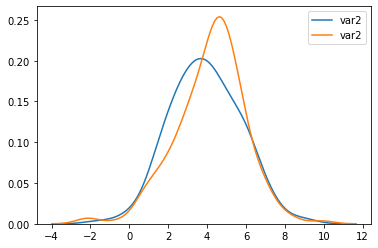

In [59]:
sns.kdeplot(samples_df[samples_df.is_control == 0].var2)
sns.kdeplot(samples_df[samples_df.is_control == 1].var2)

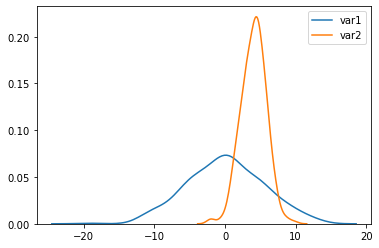

In [60]:
sns.kdeplot(samples_df.var1)
sns.kdeplot(samples_df.var2)

In [61]:
from scipy import stats

In [62]:
#Hypothesis testing
def is_significant(group1, group2, alpha=0.05):    
    t,p = stats.ttest_ind(group1,group2,equal_var=False)
    return p<alpha, p
def experiment_vs_control(df, var_name, alpha=0.05):
    #
    experiment = df[df.is_control == 0][var_name]
    control = df[df.is_control == 1][var_name]
    # 
    return is_significant(experiment, control, alpha)

In [63]:
experiment_vs_control(samples_df, 'var2')

(False, 0.1550604247157727)

In [64]:
is_significant(samples_df.var1,samples_df.var2)

(True, 3.695920640341143e-38)